In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn


In [3]:
import warnings; warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


You can upload the `heart.csv` file using the following code:

Once the file is uploaded, you can read it into a pandas DataFrame using the code from the selected cell.

In [9]:
CSV_PATH = "heart.csv"
df = pd.read_csv(CSV_PATH)

print("Shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())
display(df.head(304))


Shape: (303, 14)

Missing values:
 Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
Target       0
dtype: int64


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0,reversable,1
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2,reversable,1
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1,reversable,1
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1,normal,1


In [10]:
TARGET = "Target"                          # 1 = disease, 0 = no disease
CATEGORICAL_COLS = ["ChestPain", "Thal"]   # text columns to encode


In [11]:
for c in CATEGORICAL_COLS:
    df[c] = df[c].fillna(df[c].mode().iloc[0])


In [20]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [21]:
encoders = {}
for c in CATEGORICAL_COLS:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c].astype(str))
    encoders[c] = le  # keep if you need to inverse_transform later


In [22]:
X = df.drop(columns=[TARGET]).copy()
y = df[TARGET].copy()

num_cols = [col for col in X.columns if col not in CATEGORICAL_COLS]
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X.head(305)


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,0.708333,1.0,3,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0
1,0.791667,1.0,0,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,1
2,0.791667,1.0,0,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,2
3,0.166667,1.0,1,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,1
4,0.250000,0.0,2,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,1.0,3,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,2
299,0.812500,1.0,0,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,2
300,0.583333,1.0,0,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,2
301,0.583333,0.0,2,0.339623,0.251142,0.0,1.0,0.786260,0.0,0.000000,0.5,0.333333,1


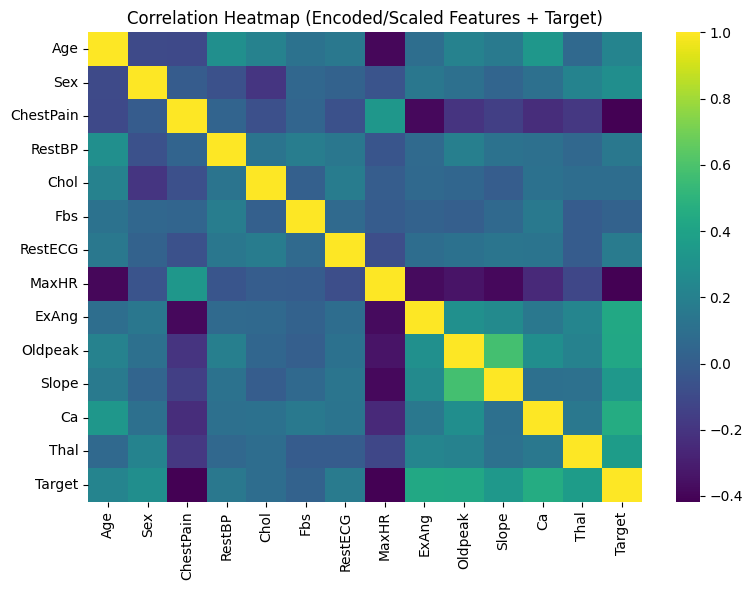

In [23]:
# Summary stats
X.describe()

# Correlation heatmap (features + target after encoding/scaling)
corr_df = pd.concat([X, y], axis=1).corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, cmap="viridis")  # simple overview
plt.title("Correlation Heatmap (Encoded/Scaled Features + Target)")
plt.tight_layout()
plt.show()


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


MODEL: 1         Logistic Regression

In [25]:
log_reg = LogisticRegression(max_iter=1000)  # reliable convergence
log_reg.fit(X_train, y_train)
pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, pred_lr)
print(f"Logistic Regression accuracy: {acc_lr:.4f}")


Logistic Regression accuracy: 0.8689


MODEL: 2                  Random Forest

In [26]:
rf = RandomForestClassifier(
    n_estimators=200, random_state=42, n_jobs=-1
)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
print(f"Random Forest accuracy:      {acc_rf:.4f}")


Random Forest accuracy:      0.9180


In [19]:
best = "Random Forest" if acc_rf >= acc_lr else "Logistic Regression"
print("Best model:", best)


Best model: Random Forest
